In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import seaborn as sns
import matplotlib.pyplot as plt
import math

# making samples Randomly

In [2]:
sample=1000
dimension=100
data=[]
for i in range(sample):
    newdata= np.random.randint(1,10, size=(1,dimension))
    data.append(newdata)
mean=np.mean(data,axis=0)
data

[array([[2, 7, 6, 3, 2, 6, 8, 2, 7, 2, 2, 6, 9, 4, 1, 6, 2, 6, 8, 7, 4, 5,
         3, 9, 1, 8, 7, 1, 4, 3, 7, 9, 1, 2, 4, 8, 6, 4, 4, 9, 4, 1, 3, 7,
         7, 8, 3, 3, 3, 5, 2, 5, 1, 8, 4, 9, 8, 3, 6, 5, 4, 5, 8, 7, 1, 7,
         9, 7, 3, 8, 5, 7, 8, 2, 2, 2, 1, 7, 9, 2, 2, 8, 4, 6, 5, 7, 8, 5,
         3, 7, 5, 6, 8, 8, 6, 4, 9, 5, 7, 7]]),
 array([[2, 5, 2, 8, 6, 7, 9, 7, 4, 2, 7, 5, 5, 7, 1, 6, 7, 2, 8, 1, 3, 1,
         3, 6, 7, 4, 3, 2, 4, 1, 2, 4, 7, 9, 4, 6, 8, 3, 6, 4, 7, 6, 1, 3,
         5, 9, 8, 2, 6, 8, 7, 7, 1, 2, 3, 9, 7, 5, 5, 8, 7, 8, 1, 3, 7, 4,
         1, 7, 1, 9, 2, 1, 1, 2, 5, 8, 4, 8, 6, 6, 1, 9, 3, 9, 6, 4, 7, 9,
         6, 7, 9, 1, 5, 5, 9, 6, 6, 3, 9, 1]]),
 array([[5, 6, 4, 2, 5, 8, 8, 8, 4, 9, 1, 7, 5, 1, 5, 2, 1, 4, 4, 3, 7, 2,
         6, 2, 5, 3, 4, 9, 9, 1, 8, 9, 8, 2, 6, 2, 1, 7, 7, 6, 4, 1, 8, 9,
         2, 7, 4, 6, 3, 4, 5, 8, 4, 7, 5, 9, 3, 2, 1, 1, 2, 9, 6, 4, 7, 1,
         4, 2, 1, 7, 8, 8, 6, 3, 1, 7, 7, 5, 2, 5, 1, 7, 3, 4, 8, 6, 3, 1,
    

# A) Sampling with bivariate Normal 

In [3]:
#calculation of covariance of d matrix
d = np.array(data)[:,0]
covD = np.cov(d.T)
covD

array([[ 6.54231732,  0.19994995, -0.15271271, ...,  0.21839339,
        -0.30866366, -0.36491491],
       [ 0.19994995,  6.37987988, -0.17237237, ...,  0.14089089,
         0.04169169,  0.0995996 ],
       [-0.15271271, -0.17237237,  6.7946987 , ...,  0.16984985,
         0.33156356,  0.12244244],
       ...,
       [ 0.21839339,  0.14089089,  0.16984985, ...,  6.54151652,
         0.00957457, -0.09044044],
       [-0.30866366,  0.04169169,  0.33156356, ...,  0.00957457,
         6.69692793,  0.02933934],
       [-0.36491491,  0.0995996 ,  0.12244244, ..., -0.09044044,
         0.02933934,  6.63973974]])

<p style="text-align:right">حالا که ما کواریانس و میانگین از داده های تصادفی داریم، سمپل گیری با کمک توزیع نرمال را انجام می دهیم. لازم به ذکر است احتیاجی به ایجاد داده های تصادفی نبود اما برای سهولت در به دست آوردن کواریانس و میانگین اولیه انجام شد</p>

In [4]:
#Sample from bivariate Normal
normalData=np.random.multivariate_normal(mean[0],covD,sample)
ExpectedValue=np.mean(normalData,axis=0)
ExpectedValue
normalData

array([[ 5.77143255,  5.26138878,  7.71872582, ...,  0.51633037,
         3.72798935,  2.81877183],
       [ 6.16021413,  6.17766611,  7.15116561, ...,  6.89931926,
         0.8944357 ,  7.75513211],
       [ 6.05979207,  4.34287986,  2.2339682 , ...,  8.63893687,
         8.51767232,  7.08298105],
       ...,
       [ 7.23725779,  6.54199888,  4.41163859, ...,  4.51964711,
         1.40082434,  3.6212027 ],
       [ 6.02772758,  6.85691599, 11.67023743, ...,  8.77488971,
         5.08425236,  8.10177726],
       [ 2.09883039,  4.51394008,  9.1323636 , ...,  7.57896972,
         5.79507928,  3.0554061 ]])

In [5]:
# print(normalData)
print('...........')
print(type(normalData))


...........
<class 'numpy.ndarray'>


<p style="text-align:right">  برای تعریف نمونه گیری گیبز از فرمول های زیر جهت به روزرسانی میانگین و کواریانس استفاده شد</p>
<span class="mrow" id="MathJax-Span-651"><span class="texatom" id="MathJax-Span-652"><span class="mrow" id="MathJax-Span-653"><span class="munderover" id="MathJax-Span-654"><span style="display: inline-block; position: relative; width: 0.692em; height: 0px;"><span style="position: absolute; clip: rect(3.45em, 1000.69em, 4.356em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-655" style="font-family: MathJax_Math-bold-italic;">μ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; clip: rect(3.278em, 1000.48em, 3.58em, -999.998em); top: -4.006em; left: 0.088em;"><span class="mo" id="MathJax-Span-656" style="font-family: MathJax_Main-bold;">¯</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-657" style="font-family: MathJax_Main; padding-left: 0.261em;">=</span><span class="mrow" id="MathJax-Span-658" style="padding-left: 0.261em;"><span class="msubsup" id="MathJax-Span-659"><span style="display: inline-block; position: relative; width: 1.209em; height: 0px;"><span style="position: absolute; clip: rect(3.45em, 1000.69em, 4.356em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-660" style="font-family: MathJax_Math-bold-italic;">μ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; top: -3.877em; left: 0.692em;"><span class="mn" id="MathJax-Span-661" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span><span class="mo" id="MathJax-Span-662" style="font-family: MathJax_Main-bold; padding-left: 0.218em;">+</span><span class="msubsup" id="MathJax-Span-663" style="padding-left: 0.218em;"><span style="display: inline-block; position: relative; width: 1.726em; height: 0px;"><span style="position: absolute; clip: rect(3.192em, 1000.78em, 4.14em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-664" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; top: -3.877em; left: 0.821em;"><span class="texatom" id="MathJax-Span-665"><span class="mrow" id="MathJax-Span-666"><span class="mn" id="MathJax-Span-667" style="font-size: 70.7%; font-family: MathJax_Main-bold;">12</span></span></span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-668"><span style="display: inline-block; position: relative; width: 1.942em; height: 0px;"><span style="position: absolute; clip: rect(3.192em, 1000.78em, 4.14em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-669" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; clip: rect(3.407em, 1001.12em, 4.14em, -999.998em); top: -4.351em; left: 0.821em;"><span class="texatom" id="MathJax-Span-670"><span class="mrow" id="MathJax-Span-671"><span class="mo" id="MathJax-Span-672" style="font-size: 70.7%; font-family: MathJax_Main-bold;">−</span><span class="mn" id="MathJax-Span-673" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; clip: rect(3.407em, 1000.91em, 4.14em, -999.998em); top: -3.705em; left: 0.821em;"><span class="texatom" id="MathJax-Span-674"><span class="mrow" id="MathJax-Span-675"><span class="mn" id="MathJax-Span-676" style="font-size: 70.7%; font-family: MathJax_Main-bold;">22</span></span></span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span><span class="mo" id="MathJax-Span-677" style="font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-678" style="font-family: MathJax_Math-bold-italic;">a</span><span class="mo" id="MathJax-Span-679" style="font-family: MathJax_Main-bold; padding-left: 0.218em;">−</span><span class="msubsup" id="MathJax-Span-680" style="padding-left: 0.218em;"><span style="display: inline-block; position: relative; width: 1.209em; height: 0px;"><span style="position: absolute; clip: rect(3.45em, 1000.69em, 4.356em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-681" style="font-family: MathJax_Math-bold-italic;">μ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; top: -3.877em; left: 0.692em;"><span class="mn" id="MathJax-Span-682" style="font-size: 70.7%; font-family: MathJax_Main-bold;">2</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span><span class="mo" id="MathJax-Span-683" style="font-family: MathJax_Main-bold;">)</span></span></span>
<br/>
<div class="MathJax_Display" style="text-align: left;"><span class="MathJax" id="MathJax-Element-33-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-684" style="width: 12.244em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.563em; height: 0px; font-size: 116%;"><span style="position: absolute; clip: rect(1.338em, 1010.56em, 2.761em, -999.998em); top: -2.325em; left: 0em;"><span class="mrow" id="MathJax-Span-685"><span class="texatom" id="MathJax-Span-686"><span class="mrow" id="MathJax-Span-687"><span class="munderover" id="MathJax-Span-688"><span style="display: inline-block; position: relative; width: 0.821em; height: 0px;"><span style="position: absolute; clip: rect(3.192em, 1000.78em, 4.14em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-689" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; clip: rect(3.278em, 1000.48em, 3.58em, -999.998em); top: -4.265em; left: 0.131em;"><span class="mo" id="MathJax-Span-690" style="font-family: MathJax_Main-bold;">¯</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-691" style="font-family: MathJax_Main; padding-left: 0.261em;">=</span><span class="mrow" id="MathJax-Span-692" style="padding-left: 0.261em;"><span class="msubsup" id="MathJax-Span-693"><span style="display: inline-block; position: relative; width: 1.726em; height: 0px;"><span style="position: absolute; clip: rect(3.192em, 1000.78em, 4.14em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-694" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; top: -3.877em; left: 0.821em;"><span class="texatom" id="MathJax-Span-695"><span class="mrow" id="MathJax-Span-696"><span class="mn" id="MathJax-Span-697" style="font-size: 70.7%; font-family: MathJax_Main-bold;">11</span></span></span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span><span class="mo" id="MathJax-Span-698" style="font-family: MathJax_Main-bold; padding-left: 0.218em;">−</span><span class="msubsup" id="MathJax-Span-699" style="padding-left: 0.218em;"><span style="display: inline-block; position: relative; width: 1.726em; height: 0px;"><span style="position: absolute; clip: rect(3.192em, 1000.78em, 4.14em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-700" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; top: -3.877em; left: 0.821em;"><span class="texatom" id="MathJax-Span-701"><span class="mrow" id="MathJax-Span-702"><span class="mn" id="MathJax-Span-703" style="font-size: 70.7%; font-family: MathJax_Main-bold;">12</span></span></span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-704"><span style="display: inline-block; position: relative; width: 1.942em; height: 0px;"><span style="position: absolute; clip: rect(3.192em, 1000.78em, 4.14em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-705" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; clip: rect(3.407em, 1001.12em, 4.14em, -999.998em); top: -4.351em; left: 0.821em;"><span class="texatom" id="MathJax-Span-706"><span class="mrow" id="MathJax-Span-707"><span class="mo" id="MathJax-Span-708" style="font-size: 70.7%; font-family: MathJax_Main-bold;">−</span><span class="mn" id="MathJax-Span-709" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; clip: rect(3.407em, 1000.91em, 4.14em, -999.998em); top: -3.705em; left: 0.821em;"><span class="texatom" id="MathJax-Span-710"><span class="mrow" id="MathJax-Span-711"><span class="mn" id="MathJax-Span-712" style="font-size: 70.7%; font-family: MathJax_Main-bold;">22</span></span></span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-713"><span style="display: inline-block; position: relative; width: 1.726em; height: 0px;"><span style="position: absolute; clip: rect(3.192em, 1000.78em, 4.14em, -999.998em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-714" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span><span style="position: absolute; top: -3.877em; left: 0.821em;"><span class="texatom" id="MathJax-Span-715"><span class="mrow" id="MathJax-Span-716"><span class="mn" id="MathJax-Span-717" style="font-size: 70.7%; font-family: MathJax_Main-bold;">21</span></span></span><span style="display: inline-block; width: 0px; height: 4.011em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.33em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.398em; border-left: 0px solid; width: 0px; height: 1.453em;"></span></span></nobr></span></div>
<p style="text-align:right"> پس از آن با استفاده از تابع توزیع نرمال نمونه های جدید تولید می شوند که در این برنامه مقدار یک داده به روز می شود و پس از آن مجددا وارد حلقه شده و این فرایند تا به روز شدن همه مقادیر ادامه خواهد داشت.</p>

In [6]:
#Gibbs sampling in our data
gibssSample = np.zeros((sample,dimension))
b=[]
currentD = normalData[0]
for i in range(sample):
    
    for j in range(dimension):
        index = np.arange(dimension)
        newCov = covD[:, index != j]
        cov2=newCov[index !=j,: ]
        cov1=covD[j,index !=j ]
        a=currentD[index != j]
        mu2=ExpectedValue[index !=j]
        mu_cond=ExpectedValue[j] +cov1 @ np.linalg.inv(cov2) @(a - mu2).T
        cov_cond=covD[j,j] -cov1 @ np.linalg.inv(cov2) @(cov1).T
        conditionalP=automatic_samples=np.random.multivariate_normal([mu_cond],[[cov_cond]])
        currentD[j]=conditionalP
    b.append(list(currentD))
print(b)

[[1.300306613407817, 5.959526443957954, 5.581952611656164, 0.9760739766262496, 4.1740592489221875, 5.7575652654996485, 7.974843069521308, 2.940366203418219, 5.467778659643401, 6.560016876680999, 6.57067218594833, 0.17434513319309985, 6.3836130504782105, 6.448317633810997, 8.744190690238593, 1.777039391344588, 5.409788021198658, 0.9772070437875762, 1.3868449113490797, 5.019420915777799, 4.872269736140271, 3.5575450976719933, 4.6516991291884535, 3.754122354952891, 4.075160647959563, 3.504146263783641, 6.962215935339421, 5.5947060993505335, -0.13122292090477794, 3.977114133712401, 4.949835714123813, 3.6604131414980676, 7.3630673598072125, 3.343204434703974, 8.725052793287045, 6.3304119043997105, 3.788578306868807, 2.5751515280113084, 2.3287407517417997, 3.400852209412182, 4.8255225626221785, 1.3238745965661853, 1.1007410315443904, 0.5447802235141701, 5.3879183734186205, 4.392393420074649, 8.0476591716762, 4.743641112790623, 4.405066467782663, 10.15015032053591, 3.244799220383924, 9.504125

In [7]:
gibssSample = b
len(gibssSample)

1000

# evaluation measurenment

In [8]:
sample_mean = np.mean(gibssSample, axis=0)
sample_mean

array([4.80508766, 4.88221136, 4.87148312, 4.99925161, 4.75382051,
       5.24696141, 5.19173265, 4.885711  , 5.22710845, 5.05340339,
       5.04134393, 5.08049489, 4.93279508, 5.28880227, 4.85205116,
       4.88518072, 5.10451569, 4.86401833, 4.95853713, 5.06378516,
       4.9955848 , 5.07237015, 4.77928317, 4.92566506, 4.83183044,
       5.21871605, 4.97338838, 5.12046057, 5.09128008, 4.89669357,
       5.29829791, 4.95351833, 5.19054183, 4.78112711, 5.08673848,
       4.90797701, 5.03399105, 4.95769031, 5.25377777, 4.98852235,
       5.26680099, 4.64453289, 4.99705286, 4.93176408, 4.74070642,
       5.01653184, 5.04776885, 5.07008702, 5.03260615, 4.855808  ,
       4.77034828, 5.18888481, 5.09307137, 5.06146211, 4.95028984,
       4.87565942, 4.68474652, 4.99520247, 5.13815046, 4.95342416,
       4.74499535, 5.30813618, 4.87849909, 4.77649215, 4.97332038,
       4.99548039, 4.6375666 , 4.86626039, 4.89720274, 4.99234256,
       4.95917843, 5.11592889, 4.7551945 , 5.00298342, 4.95365

<p style="text-align:right">جهت سنجش الگوریتم نمونه گیری نرم تفاضل میانگین داده های اصلی با مقدار میانگین الگوریتم سنجیده شد</p>

In [9]:
squerError= np.linalg.norm(ExpectedValue - sample_mean)
squerError

0.9164473482438884

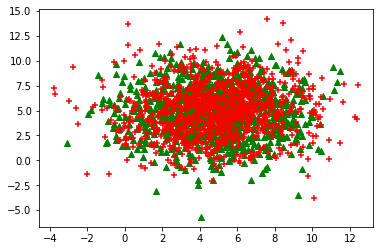

In [10]:

plt.scatter(np.array(gibssSample)[:,0],np.array(gibssSample)[:,1], color='green', marker='^')
plt.scatter(normalData[:,0],normalData[:,1], color="red", marker='+')

<p style="text-align:right">بنا بر جست جو های اینترنتی تصور میرفت که با افزایش نمونه دقت نیز افزایش یابند اما پس از آزمایش های متعدد و تغییر ابعاد و نمونه ها، مشاهده گشت ارتباط مستقیمی میان این پارامترها وجود ندارد</p>